### Project 2 - Predicting Hospital Readmissions

* Problem: Predict hospital readmissions within 30 days.
* Objective: Build a predictive model for high-risk patients.
* Tasks:
    - Data Preprocessing
    - Feature Engineering
    - Model Building
    - Model Evaluation


In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import warnings
warnings.filterwarnings("ignore")

## Read the Dataframe

In [55]:
df_1 = pd.read_csv("hospital_readmissions_only_int.csv")

In [56]:
df_1.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,2,1,1,33,2,4,1,1,5,2,1
1,2,32,0,2,0,81,10,4,4,1,6,2,0
2,3,78,0,2,1,75,29,4,0,3,5,1,0
3,4,38,1,0,0,77,11,2,3,4,9,2,1
4,5,41,0,2,0,50,25,3,4,1,3,2,1


# Replacing the Unknown(2) values of A1C_Result

In [57]:
# Drop rows where 'A1C_Result' has the value 'Unknown(2)'
A1C_Null = df_1[df_1['A1C_Result'] == 2]

In [58]:
A1C_Null.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,2,1,1,33,2,4,1,1,5,2,1
1,2,32,0,2,0,81,10,4,4,1,6,2,0
3,4,38,1,0,0,77,11,2,3,4,9,2,1
4,5,41,0,2,0,50,25,3,4,1,3,2,1
5,6,20,1,0,3,11,20,3,4,1,3,2,0


In [59]:
A1C_Null['A1C_Result'].unique()

array([2])

In [60]:
A1C_Null.shape

(434, 13)

## Handling Outliers

In [61]:
# Find outlier using Boxplot

In [62]:
# Function for box plot   
def plot_box_plots(df, cols):

    plt.figure(figsize=(10, 12))
    
    for i, col in enumerate(cols):
        plt.subplot(4, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

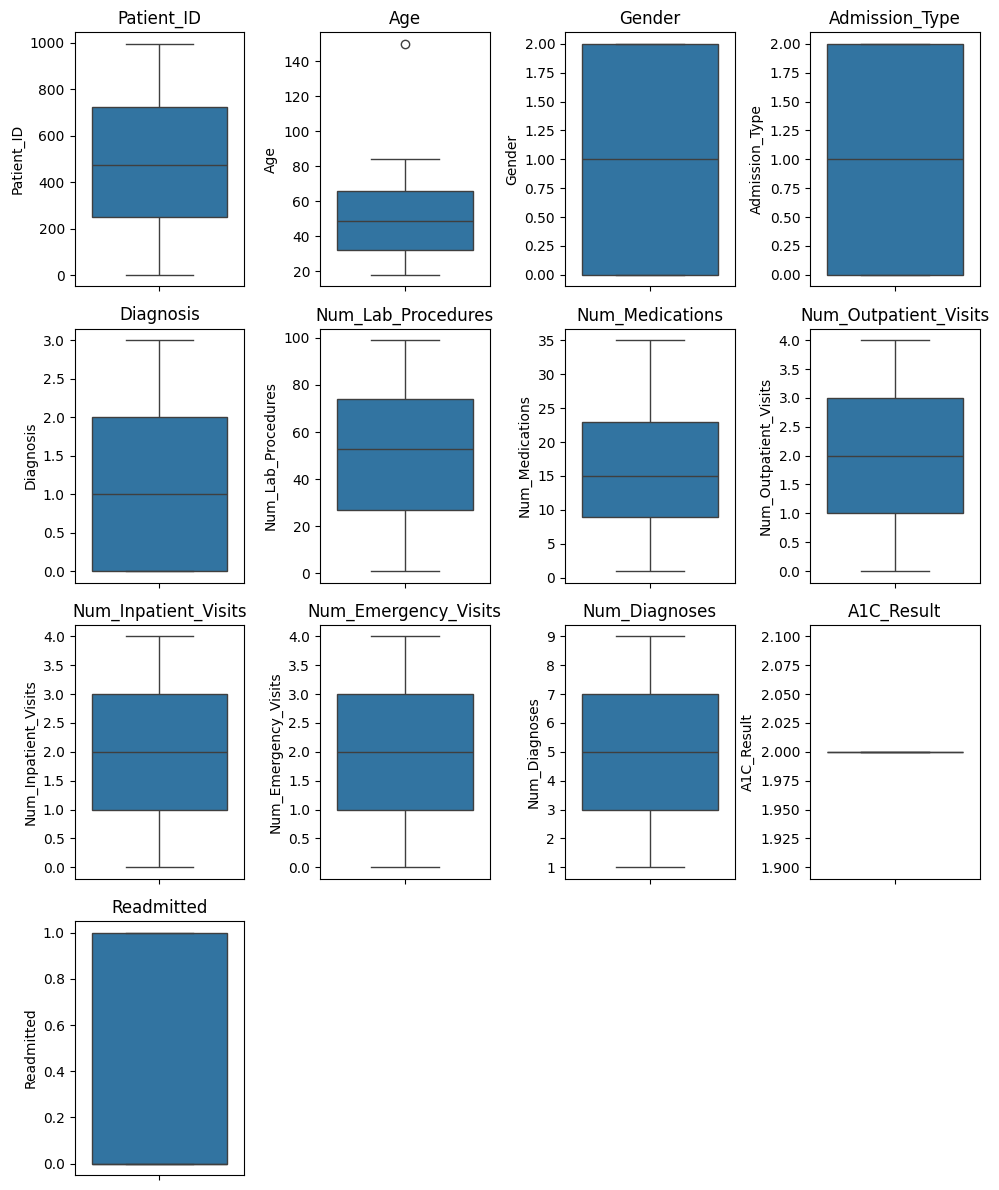

In [63]:
columns = A1C_Null.columns
plot_box_plots(A1C_Null, columns)

In [64]:
# Find outlier using IQR

In [65]:
# Calculate quartiles and IQR
Q1 = A1C_Null.quantile(0.25)
Q3 = A1C_Null.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = A1C_Null[(A1C_Null < lower_bound) | (A1C_Null > upper_bound)]

# Count outliers
num_outliers = outliers.count()

print("Number of outliers:")
print(num_outliers)

Number of outliers:
Patient_ID               0
Age                      1
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64


In [66]:
# find outlier using Z-score

In [67]:
df_age = A1C_Null["Age"]

In [68]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_zscore(df_age)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [150]


In [69]:
# converts all the values above the upper threshold to the upper threshold value
# converts all the values below the lower threshold to the lower threshold value

def outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    upper_threshold = Q3 + (1.5*IQR)
    lower_threshold = Q1 - (1.5*IQR)

    df["Age_New"] = df[col].clip(lower_threshold, upper_threshold)

In [70]:
outlier(A1C_Null,"Age")

In [71]:
# Box plot after handling outlier

<Axes: ylabel='Age_New'>

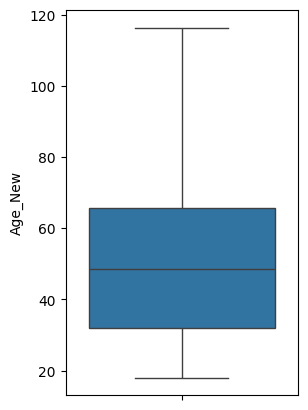

In [72]:
plt.figure(figsize=(3, 5))
sns.boxplot(data=A1C_Null, y=A1C_Null["Age_New"])

In [73]:
A1C_Null.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,434.0,488.470046,285.882597,1.0,251.5,474.5,723.75,995.000
Age,434.0,48.751152,20.176423,18.0,32.0,48.5,65.75,150.000
Gender,434.0,1.000000,0.804146,0.0,0.0,1.0,2.00,2.000
Admission_Type,434.0,0.990783,0.823953,0.0,0.0,1.0,2.00,2.000
Diagnosis,434.0,1.479263,1.108766,0.0,0.0,1.0,2.00,3.000
Num_Lab_Procedures,434.0,51.341014,27.313065,1.0,27.0,53.0,74.00,99.000
Num_Medications,434.0,15.679724,8.098482,1.0,9.0,15.0,23.00,35.000
Num_Outpatient_Visits,434.0,2.041475,1.407054,0.0,1.0,2.0,3.00,4.000
Num_Inpatient_Visits,434.0,2.096774,1.422303,0.0,1.0,2.0,3.00,4.000
Num_Emergency_Visits,434.0,1.970046,1.409806,0.0,1.0,2.0,3.00,4.000


In [74]:
# droping the 'age' column

In [75]:
A1C_Null_1 = A1C_Null.drop(columns=["Age"], axis=1)

## Handling Skwness

In [76]:
# Function for histogram 
def plot_histograms(df, cols):

    plt.figure(figsize=(8, 15))

    for i, col in enumerate(cols):
        plt.subplot(7,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon") 
        plt.title(col)
    plt.tight_layout()
    plt.show()

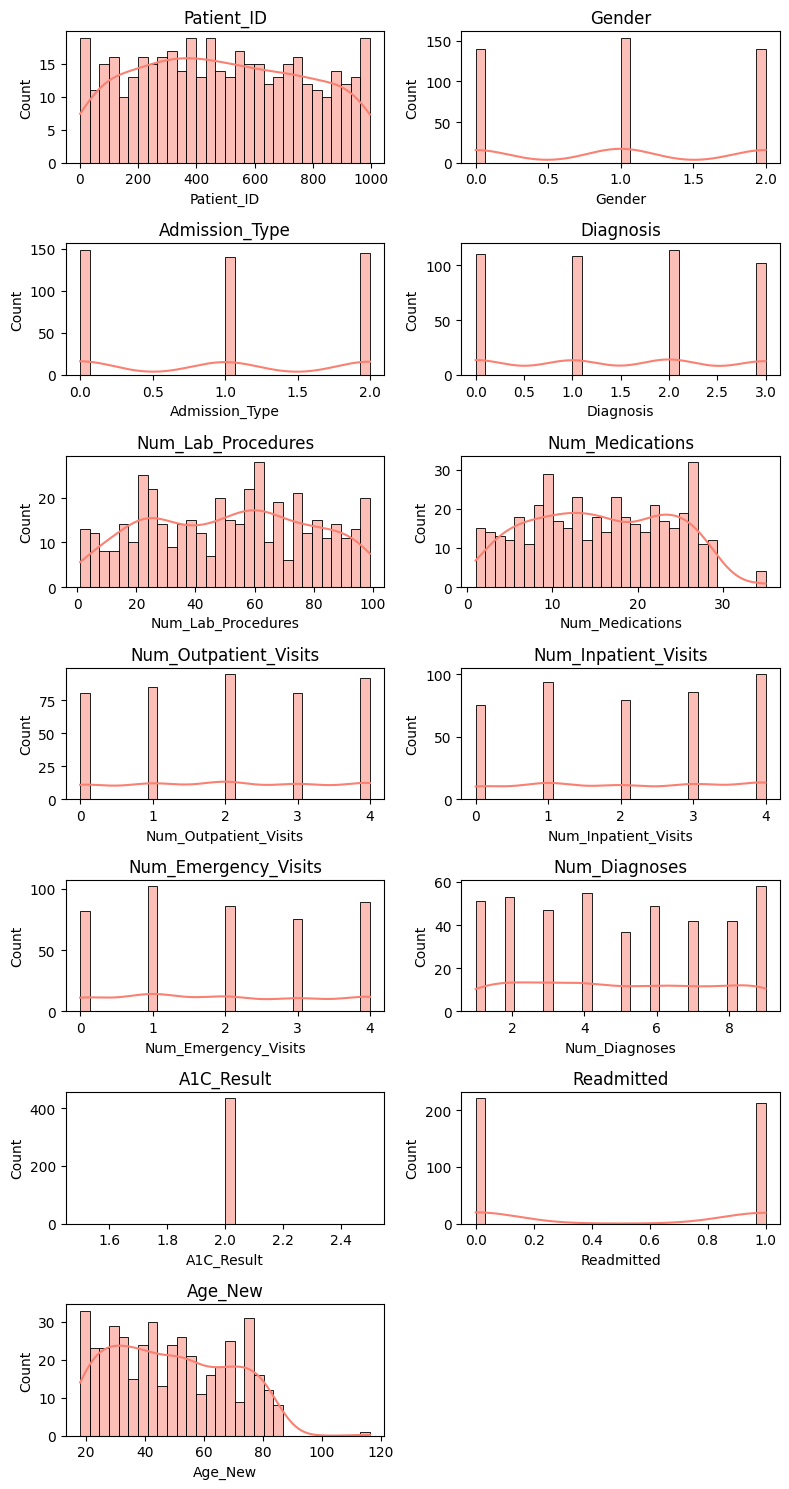

In [77]:
columns = A1C_Null_1.columns
plot_histograms(A1C_Null_1, columns)

In [78]:
A1C_Null_1.skew()

Patient_ID               0.075914
Gender                   0.000000
Admission_Type           0.017123
Diagnosis                0.011694
Num_Lab_Procedures      -0.021948
Num_Medications          0.038184
Num_Outpatient_Visits   -0.018901
Num_Inpatient_Visits    -0.050558
Num_Emergency_Visits     0.088058
Num_Diagnoses            0.067863
A1C_Result               0.000000
Readmitted               0.037001
Age_New                  0.224498
dtype: float64

    Skewness is a measure of lack of symmetry
    Skewness value range from -1 to 1:

- If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If the skewness is less than -0.5, the distribution is negatively skewed (left-skewed).
- If the skewness is greater than 0.5, the distribution is positively skewed (right-skewed).

# Feature Selection

In [79]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [80]:
calc_vif(A1C_Null_1)

,variables,VIF
0,Patient_ID,1.036096
1,Gender,1.026774
2,Admission_Type,1.055873
3,Diagnosis,1.040362
4,Num_Lab_Procedures,1.045460
5,Num_Medications,1.035217
6,Num_Outpatient_Visits,1.024301
7,Num_Inpatient_Visits,1.030288
8,Num_Emergency_Visits,1.026881
9,Num_Diagnoses,1.023218


Variance Inflation Factor
-  VIF values below 5 indicate that multicollinearity is not a significant concern, and the predictor variables are likely not highly correlated with each other.
- VIF values between 5 and 10 suggest moderate multicollinearity.
- VIF values above 10 indicate potentially severe multicollinearity. 

In [81]:
# Droping the multicollinearity & unwanted columns             

In [82]:
A1C_Null_2 = A1C_Null_1.drop(columns=["Age_New","Patient_ID","A1C_Result"], axis=1)

In [83]:
calc_vif(A1C_Null_2)

,variables,VIF
0,Gender,2.418358
1,Admission_Type,2.368950
2,Diagnosis,2.502985
3,Num_Lab_Procedures,4.055986
4,Num_Medications,4.418195
5,Num_Outpatient_Visits,2.903673
6,Num_Inpatient_Visits,2.960254
7,Num_Emergency_Visits,2.685506
8,Num_Diagnoses,4.012756
9,Readmitted,1.938621


In [84]:
A1C_Null_2.isnull().sum()

Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
Readmitted               0
dtype: int64

In [85]:
A1C_Null_2.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted
0,2,1,1,33,2,4,1,1,5,1
1,0,2,0,81,10,4,4,1,6,0
3,1,0,0,77,11,2,3,4,9,1
4,0,2,0,50,25,3,4,1,3,1
5,1,0,3,11,20,3,4,1,3,0


#   Predict Hospital Re-admissions Model 

In [86]:
import pickle

In [87]:
# Loading the MODEL
with open("A1C_Model.pkl","rb") as m1:
    A1C_Model = pickle.load(m1)

In [88]:
new_A1C = A1C_Model.predict(A1C_Null_2)

In [89]:
A1C_Null_2['A1C_Result'] = new_A1C

In [90]:
# Using pop replace 'Readmitted' placing to the last position
A1C_Result_column  = A1C_Null_2.pop('Readmitted')

A1C_Null_2['Readmitted'] = A1C_Result_column

In [91]:
A1C_Null_2.tail()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
990,2,0,1,69,12,1,3,3,6,0,1
991,2,0,0,85,5,1,2,1,9,0,0
992,1,0,2,10,23,0,2,3,1,1,0
993,0,2,1,83,16,0,1,4,5,0,1
994,2,2,2,25,14,2,1,0,9,0,0


In [92]:
A1C_Null_2.shape

(434, 11)

In [93]:
# saving with actual A1C values

A1C_Null_2.to_csv("hospital_with_predicted_A1C.csv", index= False)